# Data Distribution, A/B Test & Permutation Test

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(15, 9)})
sns.set(font_scale=1.5) 

### Part 1. Data Exploration

The `food_consumption.csv` dataset from the `food` folder contains data on the several countries' food consumption per food category and their respective CO2 emissions. Let's load it to a DataFrame (we will call it `food`) and let's check its contents.

In [2]:
food = pd.read_excel('data/food_consumption.xlsx')

food.info()
# All columns are already formatted in the expected dtype and there are no null values:
# The DataFrame does not need cleaning.

food.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emission   1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 44.8+ KB


,country,food_category,consumption,co2_emission
0,Argentina,pork,10.51,37.20
1,Argentina,poultry,38.66,41.53
2,Argentina,beef,55.48,1712.00
3,Argentina,lamb_goat,1.56,54.63
4,Argentina,fish,4.36,6.96


1. Now let's use the `.describe()` method on the `food` DataFrame to produce descriptive statistics about the `consumption` metric for each class in the `food_category` variable. Let's answer to the question: **which `food_category` has the highest median value of `food_consumption`?** 

In [3]:
# Q1. PART 1

df = food.groupby('food_category')['consumption'].describe()
df

,count,mean,std,min,25%,50%,75%,max
food_category,,,,,,,,
beef,130.0,12.123385,9.654140,0.78,4.9975,8.285,17.9400,55.48
dairy,130.0,125.774692,93.327721,3.04,45.7925,110.975,192.7150,430.76
eggs,130.0,8.163769,5.032582,0.16,3.9450,8.420,12.3125,19.15
fish,130.0,17.287077,19.013508,0.24,6.0250,13.950,21.8525,179.71
lamb_goat,130.0,2.600154,3.665252,0.00,0.5600,1.325,3.1025,21.12
nuts,130.0,4.137231,3.372817,0.18,1.8050,3.495,5.6100,23.03
pork,130.0,16.123692,15.717646,0.00,2.0900,10.355,28.2275,67.11
poultry,130.0,21.219231,14.571980,0.47,10.9100,19.855,29.7475,62.50
rice,130.0,29.375154,37.324471,0.95,4.7200,11.875,43.4425,171.73


In [4]:
# Q1. PART 2 - VERSION 1 (groupby + describe)

max_value = df['50%'].sort_values(ascending=False)[0]
max_value_index = df['50%'].sort_values(ascending=False).index[0]

print(f'Max value: {max_value}')
print(f'Food Category with maximum value: {max_value_index}')

Max value: 110.975
Food Category with maximum value: dairy


In [5]:
# Q1. PART 2 - VERSION 2 (ciclo for + describe)
# Just for fun, let's rebuild the df dataframe (extracted via groupby + describe) using a for loop:

# extract the unique values for food_category:
food_categories = food['food_category'].unique()

# create an empty DataFrame:
df_2 = pd.DataFrame([])

# create a for loop that for each of my food_category:
for el in food_categories:
    category = food[food['food_category']==el]
    # it creates a temporary dataframe:
    df_tmp = category.describe()['consumption']
    # it renames its header with the food category:
    df_tmp = df_tmp.rename(el)
    # it pastes each temporary dataframe to an initially empty DataFrame which, at the end of the cycle, will contain all the
    # descriptive statistics of each category
    df_2 = pd.concat([df_2, df_tmp], axis = 1)
    
# Let's transpose the matrix to bring it back to the layout of the previous version (named df):
df_2 = df_2.T
df_2

,count,mean,std,min,25%,50%,75%,max
pork,130.0,16.123692,15.717646,0.00,2.0900,10.355,28.2275,67.11
poultry,130.0,21.219231,14.571980,0.47,10.9100,19.855,29.7475,62.50
beef,130.0,12.123385,9.654140,0.78,4.9975,8.285,17.9400,55.48
lamb_goat,130.0,2.600154,3.665252,0.00,0.5600,1.325,3.1025,21.12
fish,130.0,17.287077,19.013508,0.24,6.0250,13.950,21.8525,179.71
eggs,130.0,8.163769,5.032582,0.16,3.9450,8.420,12.3125,19.15
dairy,130.0,125.774692,93.327721,3.04,45.7925,110.975,192.7150,430.76
wheat,130.0,71.549538,44.191318,2.74,37.0450,69.420,103.3725,197.50
rice,130.0,29.375154,37.324471,0.95,4.7200,11.875,43.4425,171.73
soybeans,130.0,0.860538,2.083336,0.00,0.0100,0.075,0.6400,16.95


In [6]:
# Let's extract the category with the highest median value of food_consumption:

median_values = df_2['50%'].to_frame().reset_index().rename(columns={'index': 'food_category', '50%': 'median'})
median_values[median_values['median']==median_values['median'].max()]

,food_category,median
6,dairy,110.975


2. Now let's plot in a single chart one boxplot for each `food_category` using the variable `co2_emission` as the metric and let's answer these questions: which `food_category` has the highest interquartile range? And which is the food_category with the highest median co2_emission value?

<AxesSubplot:xlabel='co2_emission', ylabel='food_category'>

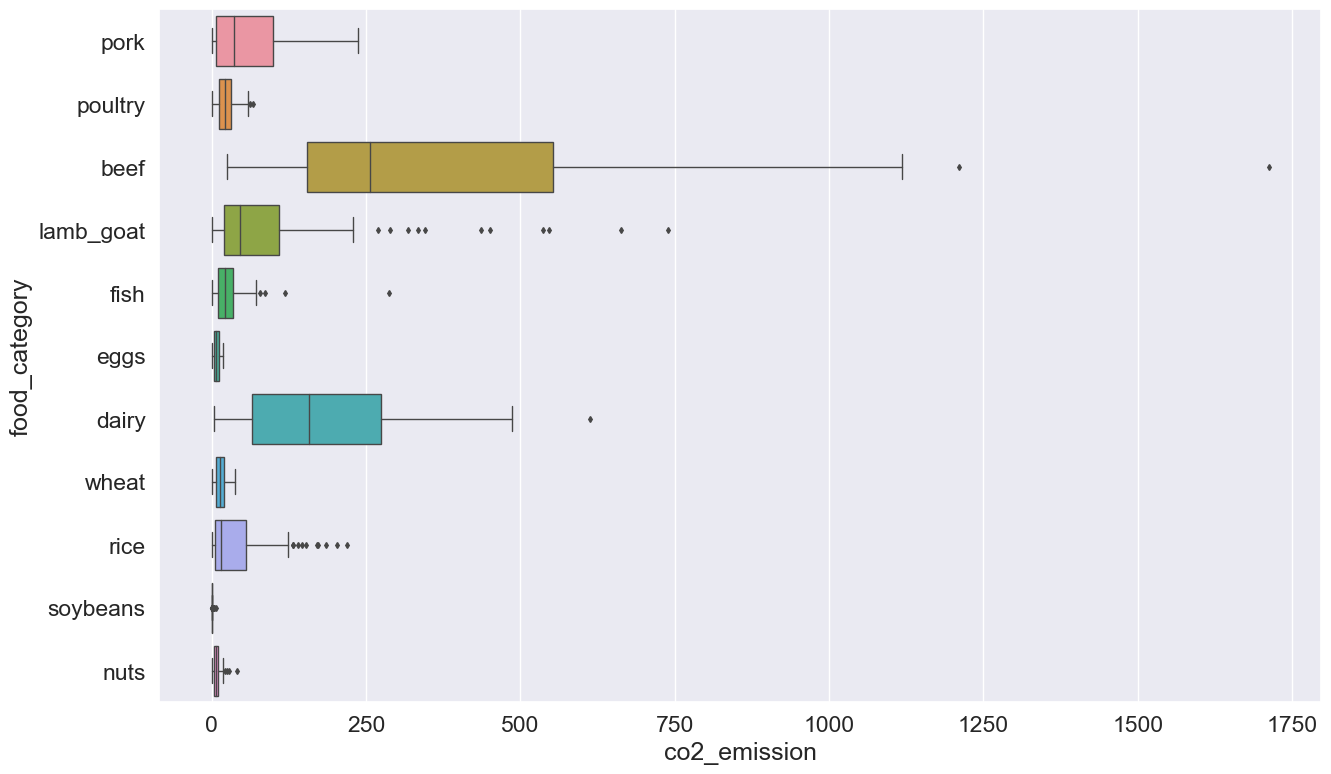

In [7]:
sns.boxplot(x = 'co2_emission', y = 'food_category', data = food, fliersize=3, linewidth=1)

In [8]:
# Q2 - Part 1

# As we can easily see from the boxplot, the category with the highest interquartile range (IQR) is beef

In [9]:
# Q2 - Part 2

# Similarly, we can observe that the category with the highest median value is beef again

### Part 2: Permutation Test

3. Let's consider the `consumption` of "poultry" and "fish" across all available `countries`; looking at the table with descriptive statistics (from point 1), the average of poultry consumption (21.22) seems to be higher than that of fish consumption (17.29), but is this difference statistically significant? Let's create a permutation test in order to assess the null hypothesis that there is no difference between the two means. **Do we accept or reject the null hypothesis?** 

In [10]:
# Q3 - Part 0

# select the portion of the dataframe that we need:
food_subset = food[(food['food_category']=='poultry') | (food['food_category']=='fish')][['food_category', 'consumption']]

food_subset = food_subset[['food_category', 'consumption']]
food_subset.head(8)

,food_category,consumption
1,poultry,38.66
4,fish,4.36
12,poultry,46.12
15,fish,17.69
23,poultry,13.23
26,fish,3.85
34,poultry,26.87
37,fish,74.41


In [11]:
# Q3 - Versione 1

# select a null hypothesis H0:
print('H0: Average poultry consumption is not greater than the average fish consumption')
print('    (mu_polutry consumption <= mu_fish_consumption)')
print('')

# assign a significance level to the test:
alpha = 0.05
print(f'Significance level alpha: {alpha}')

# create the groups containing the values of treatment and control:
treatment = food_subset[(food_subset['food_category']=='poultry')]['consumption']
control = food_subset[(food_subset['food_category']=='fish')]['consumption']

# calculate the mean for each of the two groups and the difference between the two mean:
mu_treatment = np.mean(treatment)
mu_control = np.mean(control)
mu_diff = mu_treatment - mu_control
print(f'Average consumption difference: {mu_diff:.4f}')

H0: Average poultry consumption is not greater than the average fish consumption
    (mu_polutry consumption <= mu_fish_consumption)

Significance level alpha: 0.05
Average consumption difference: 3.9322


In [12]:
# Let's do the permutations:

n = 2000
mu_diff_samples = []
for i in range(n): 
    # extract a subsample of 50% of data without replacement
    df_sample1 = food_subset.sample(frac=0.5, replace=False)
    # use set() to get indexes of rows that were not extracted from df in previous step
    ix2 = set(food_subset.index) - set(df_sample1.index)
    # create dataframe with other 50% of data
    df_sample2 = food_subset.loc[list(ix2)]
    # calculate difference in mean from each sample
    mu_diff_temp = np.mean(df_sample1['consumption']) - np.mean(df_sample2['consumption'])
    # append sampled mean difference to mu_diff_samples list
    mu_diff_samples.append(mu_diff_temp)

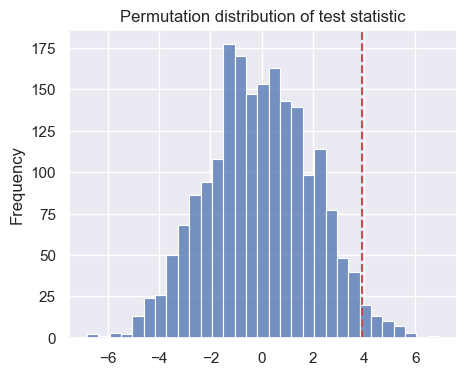

Average Simulated Test Statistic: -0.0663
Initially Observed Test Statistic: 3.9322

Results more extreme than observed: 49
Total results: 2000
p-value: 49 / 2000 = 0.0245

Test outcome: H0 rejected. The observed result is statistically significant. | p_value <= alpha


In [13]:
# Let's plot the chart and print the results:

sns.set(rc={'figure.figsize':(5,4)})
sns.histplot(mu_diff_samples)
plt.axvline(mu_diff, 0, 1, color='r', linestyle='--')
## plt.xlabel("Value of Statistic")
plt.ylabel("Frequency")
plt.title("Permutation distribution of test statistic")
plt.show()
print('Average Simulated Test Statistic:', f'{np.mean(mu_diff_samples):.4f}')
print('Initially Observed Test Statistic:', f'{mu_diff:.4f}')
print('')
print('Results more extreme than observed:', sum([el >= mu_diff for el in mu_diff_samples]))
print('Total results:', len(mu_diff_samples))
p_value = sum([el > mu_diff for el in mu_diff_samples])/n
print('p-value:', sum([el >= mu_diff for el in mu_diff_samples]), '/', len(mu_diff_samples), '=', p_value)
print('')

# view the result of the test:
if p_value <= alpha:
    print('Test outcome: H0 rejected. The observed result is statistically significant. | p_value <= alpha')
else:
    print('Test outcome: H0 not rejected. The observed result is not statistically significant. | p_value > alpha')

# CONCLUSION:
# Since the p-value is less than the significance level chosen at the beginning of the test, we can reject the null hypothesis

In [14]:
# Ne approfitto per definire una funzione di permutazione un po' più generale tale che:
# dati un DataFrame, una colonna categorica del DataFrame, due categorie all'interno della suddetta colonna, 
# una colonna valori su cui effettuare il test e il numero di permutazioni desiderate,
# effettui un permutation test per verificare se la differenza tra la media del gruppo di treatment sia
# significativamente maggiore della media del gruppo di controllo e restituisca in uscita i risultati desiderati.

# IMPORTANTE: La seguente funzione è valida solo se i gruppi di treatment e control 
#             sono costruiti su una singola condizione in una singola colonna.
#             E non, per esempio: 
#             Treatment: Gender == Male & Country == Italy
#             Control: Gender == Male & Country == France

def mu_diff_permutation_test(df, category_column, treatment_category, control_category,\
                             value_column, num_of_permutations=2000, alpha=0.05):
    # df = DataFrame
    # category_column = Colonna di df da cui estrarre le due categorie su cui effettuare il test
    # treatment_category = Categoria da testare; è un valore incluso in df[category_column]
    # control_category = Categoria da confrontare con treatment_category; è un valore incluso in df[category_column]
    # value_column = Colonna di tipo numerico di df; è la variabile che voglio testare tra i due gruppi treatment e control
    # num_of_permutations = numero di permutazioni effettuate nel test
    # alpha = Livello di significatività del test
    
    print(f'H0: Average {treatment_category} {value_column} is not greater than average {control_category} {value_column}')
    print('')
    
    # Seleziono il livello di significatività del test:
    while alpha<=0 or alpha >1:
        print("You need to insert an alpha-value between 0 and 1. Insert a valid value:")
        alpha = float(input("Significance level (alpha):"))
    
    # Seleziono la porzione del mio dataset che voglio utilizzare nel permutation test:
    df_subset = df[(df[category_column]==treatment_category) | (df[category_column]==control_category)]\
    [[category_column, value_column]]
    
    # Seleziono i gruppi di treatment e controllo:
    treatment = df_subset[(df_subset[category_column]==treatment_category)][value_column]
    control = df_subset[(df_subset[category_column]==control_category)][value_column]
    
    # Calcolo la media e la differenza tra medie:
    mu_treatment = np.mean(treatment)
    mu_control = np.mean(control)
    mu_diff = mu_treatment - mu_control
    
    # Effettuo le permutazioni col codice visto a lezione:
    n = num_of_permutations
    mu_diff_samples = []
    for i in range(n): 
        # extract a subsample of 50% of data without replacement
        df_sample1 = df_subset.sample(frac=0.5, replace=False)
        # use set() to get indexes of rows that were not extracted from df in previous step
        ix2 = set(df_subset.index) - set(df_sample1.index)
        # create dataframe with other 50% of data
        df_sample2 = df_subset.loc[list(ix2)]
        # calculate difference in mean from each sample
        mu_diff_temp = np.mean(df_sample1[value_column]) - np.mean(df_sample2[value_column])
        # append sampled mean difference to mu_diff_samples list
        mu_diff_samples.append(mu_diff_temp)
    
    # Seleziono la dimensione del grafico:
    sns.set(rc={'figure.figsize':(5,4)})
    # Traccio il grafico:
    sns.histplot(mu_diff_samples)
    # Visualizzo il valore di mu_diff nel grafico:
    plt.axvline(mu_diff, 0, 1, color='r', linestyle='--')
    # Definisco il titolo del grafico:
    plt.title("Permutation distribution of test statistic")
    # Inserisco un titolo per gli assi:
    ## plt.xlabel("Value of Statistic")
    plt.ylabel("Frequency")
    # Mostro il grafico:
    plt.show()
    
    # Stampo i risultati e l'esito del test:
    print('Average Simulated Test Statistic:', f'{np.mean(mu_diff_samples):.4f}')
    print('Initially Observed Test Statistic:', f'{mu_diff:.4f}')
    print('')
    print('Results more extreme than observed:', sum([el >= mu_diff for el in mu_diff_samples]))
    print('Total results:', len(mu_diff_samples)) 
    p_value = sum([el > mu_diff for el in mu_diff_samples])/n
    print('p-value:', sum([el >= mu_diff for el in mu_diff_samples]), '/', len(mu_diff_samples), '=', p_value)
    print('')
    if p_value <= alpha:
        print('Test outcome: H0 rejected. The observed result is statistically significant. | p_value <= alpha')
    else:
        print('Test outcome: H0 not rejected. The observed result is not statistically significant. | p_value > alpha')
    
    return mu_diff, p_value


# Potrei raffinare la funzione aggiungendo un parametro alternative (‘two-sided’, ‘less’, ‘greater’) per l'ipotesi alternativa
# su cui è calcolato il p-value. Es.:

# if alternative = 'greater' and p_value <= alpha:
#    print('Test outcome: H0 rejected etc. etc)
# else:
#    print('Test outcome: etc. etc)

# if alternative = 'less' and p_value >= (1-alpha):
#    print('Test outcome: H0 rejected etc. etc)
# else:
#    print('Test outcome: etc. etc)

# oppure:
# if alternative = 'two-sided' and (p_value <= alpha or p_value >= (1-alpha)):
#    print('Test outcome: etc. etc)
# else:
#    print('Test outcome: etc. etc)

H0: Average poultry consumption is not greater than average fish consumption



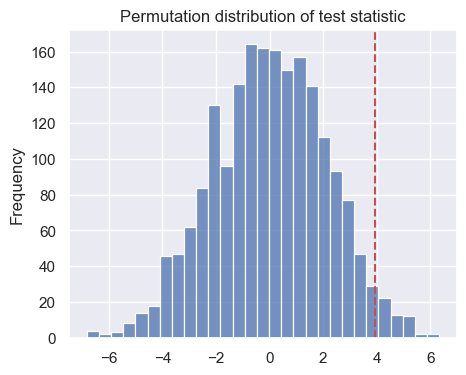

Average Simulated Test Statistic: 0.0073
Initially Observed Test Statistic: 3.9322

Results more extreme than observed: 52
Total results: 2000
p-value: 52 / 2000 = 0.026

Test outcome: H0 rejected. The observed result is statistically significant. | p_value <= alpha


(3.932153846153831, 0.026)

In [15]:
# Testo la funzione:

mu_diff_permutation_test(food, 'food_category', 'poultry', 'fish', 'consumption')
# mu_diff_permutation_test(food, 'food_category', 'pork', 'fish', 'consumption', 1000, alpha=2)

In [16]:
# Q3 Versione 2 - Scipy Permutation Test

# Ricordo che:
food_subset = food[(food['food_category']=='poultry') | (food['food_category']=='fish')][['food_category', 'consumption']]
## food_subset['group'] = ['treatment' if el =='poultry' else 'control' for el in food_subset['food_category']]
## food_subset = food_subset[['group', 'food_category', 'consumption']]
food_subset = food_subset[['food_category', 'consumption']]

treatment = food_subset[(food_subset['food_category']=='poultry')]['consumption']
control = food_subset[(food_subset['food_category']=='fish')]['consumption']

In [17]:
# importo la funzione permutation_test da scipy:
from scipy.stats import permutation_test

In [18]:
# Converto i gruppi di treatment e control in formato np.array (cioè in vettori):
treatment = np.array(treatment)
control = np.array(control)

H0: Average poultry consumption is not greater than the average fish consumption
    (mu_poultry consumption <= mu_fish_consumption)




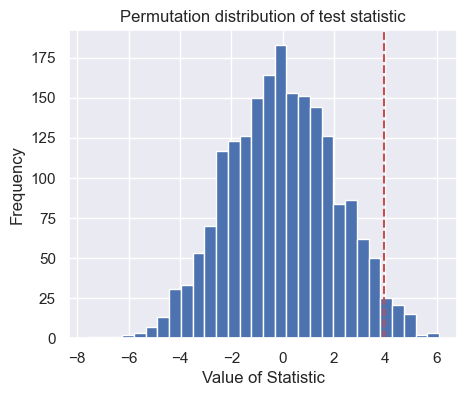


Average Simulated Test Statistic: -0.0236
Initially Observed Test Statistic: 3.9322

p-value: 0.0290

Test outcome: H0 rejected. The observed result is statistically significant. | p_value <= alpha


In [19]:
# Definisco l'ipotesi nulla:

print('H0: Average poultry consumption is not greater than the average fish consumption')
print('    (mu_poultry consumption <= mu_fish_consumption)')
print('')

# Seleziono il livello di significatività del test:
alpha = 0.05

# Definisco una funzione statistic(x, y) che definisca e calcoli la statistica desiderata, 
# cioè la differenza tra le medie dei miei due campioni (mu_diff):
def statistic(x, y, axis=0):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)

# Definisco i parametri del permutation test:
res = permutation_test((treatment, control),              # Seleziono i due gruppi di dati che voglio confrontare
                       statistic,                         # Scelgo la statistica, definita in precedenza, per cui calcolare il p-value
                       vectorized=True,                   # Scelgo di settare vectorized=True per ridurre i tempi di computazione
                       permutation_type='independent',    # Scelgo il tipo di permutazione desiderata (i sample sono indipendenti)
                       n_resamples=2000,                  # Seleziono il numero di permutazioni
                       alternative='greater',             # Calcolo il p-value come percentuale di distr. nulla maggiore (greater) di mu_diff
                       random_state=42)                   # Fisso un random_state

# NOTA: Ho settato i parametri opzionali axis=0 nella funzione statistic e vectorized=True nella funzione permutation_test 
#       per lavorare coi vettori e ridurre i tempi di computazione


mu_diff = res.statistic
p_value = res.pvalue
null_distribution = res.null_distribution

# Le funzioni statistic e permutation_test di scipy sono state compilate seguendo la seguente documentazione di scipy:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.permutation_test.html

print('')
sns.set(rc={'figure.figsize':(5,4)})
plt.hist(res.null_distribution, bins=30)
plt.axvline(mu_diff, 0, 1, color='r', linestyle='--')
plt.title("Permutation distribution of test statistic")
plt.xlabel("Value of Statistic")
plt.ylabel("Frequency")
plt.show()

print('')
print('Average Simulated Test Statistic:', f'{np.mean(null_distribution):.4f}')
print(f'Initially Observed Test Statistic: {mu_diff:.4f}')
print('')
print(f'p-value: {p_value:.4f}')
print('')
if p_value <= alpha:
    print('Test outcome: H0 rejected. The observed result is statistically significant. | p_value <= alpha')
else:
    print('Test outcome: H0 not rejected. The observed result is not statistically significant. | p_value > alpha')